In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ratioKeys = ['psRatio', 'peRatio', 'priceToBook', 'evToEbitda', 'evToEbit', 'priceToFreeCashFlow', 'evToSales', 'evToGrossProfit', 'priceToGrossProfit']
yKeys = ['yAdjustedPriceSpinoffExcl1Year', 'yAdjustedPrice1Year', 'yPrice1Year']
y2Keys = ['yAdjustedPriceSpinoffExcl2Year', 'yAdjustedPrice2Year', 'yPrice2Year']
numericalKeys = ratioKeys + yKeys + y2Keys

In [5]:
relativeDf = pd.read_csv('../data/temp-relative.csv', sep='\t')

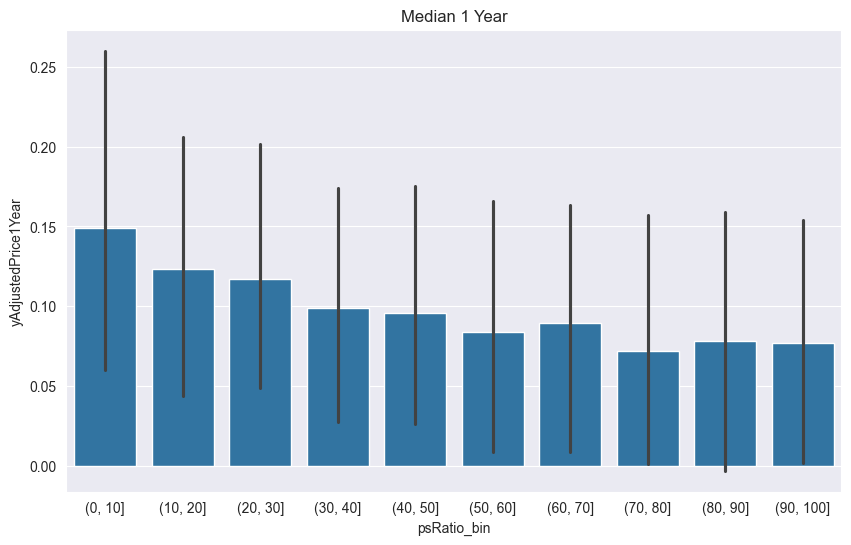

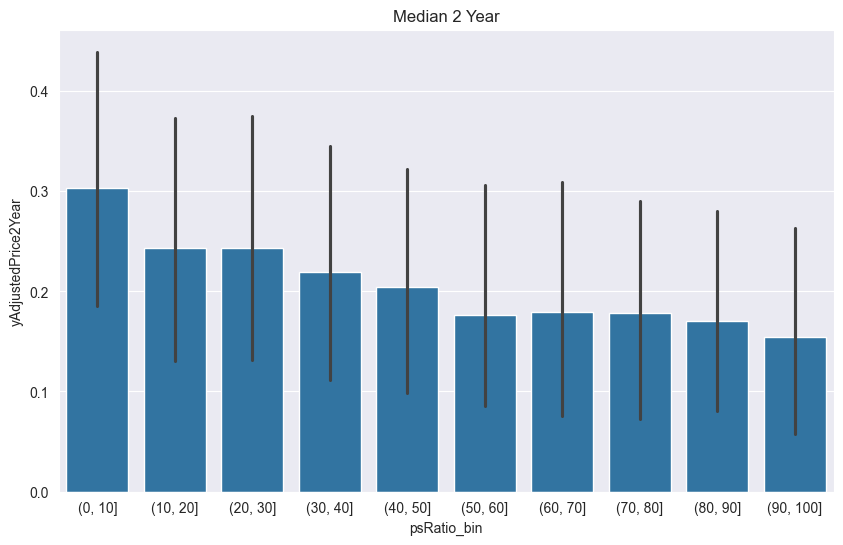

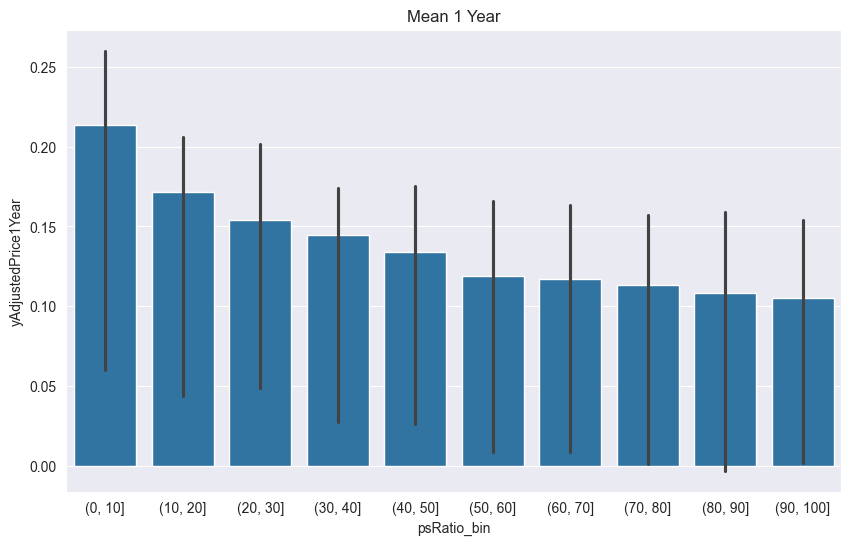

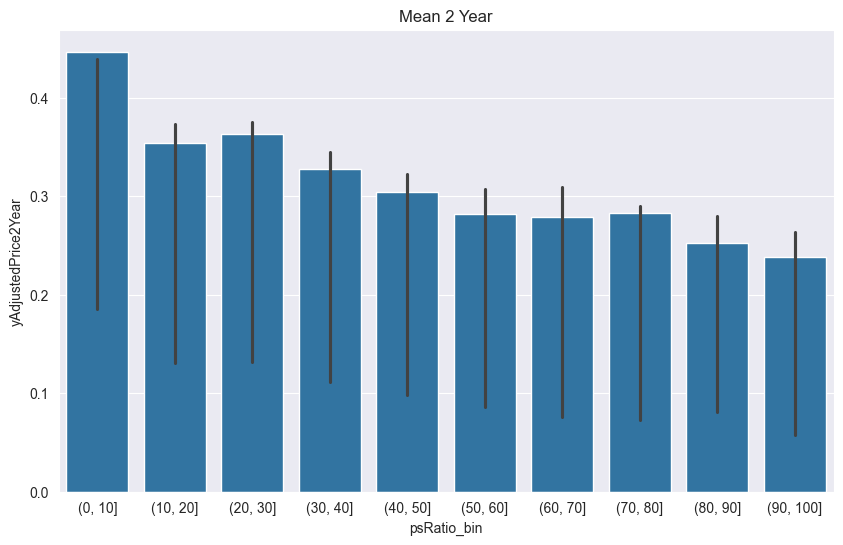

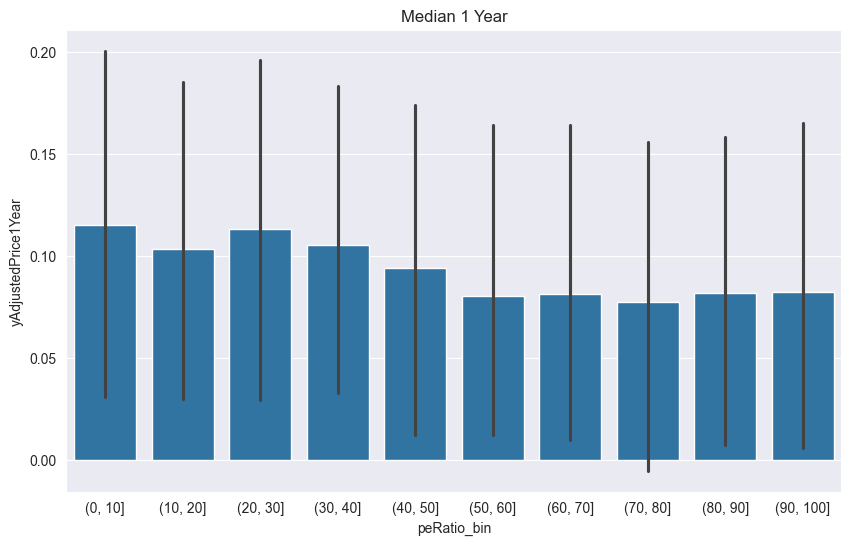

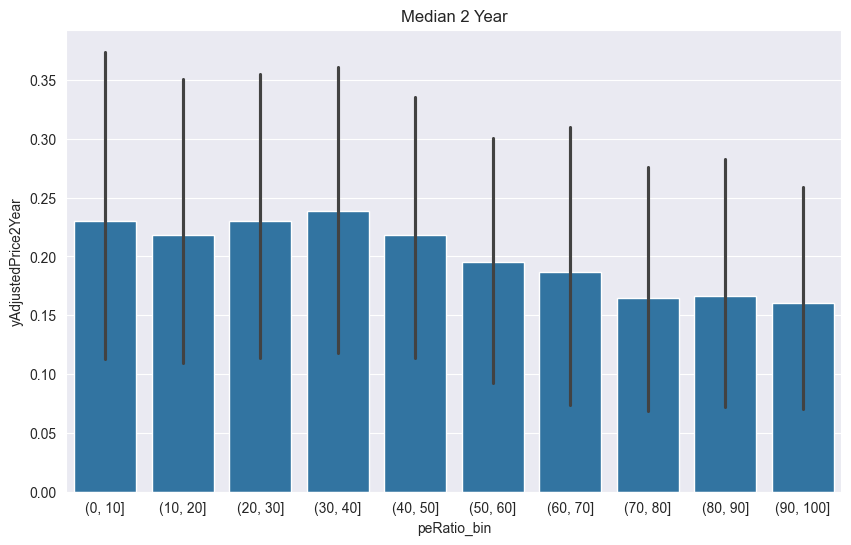

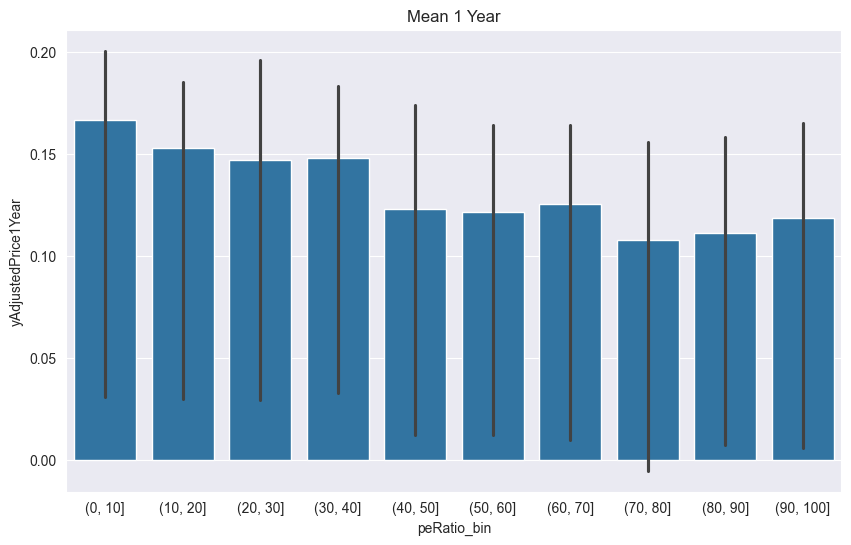

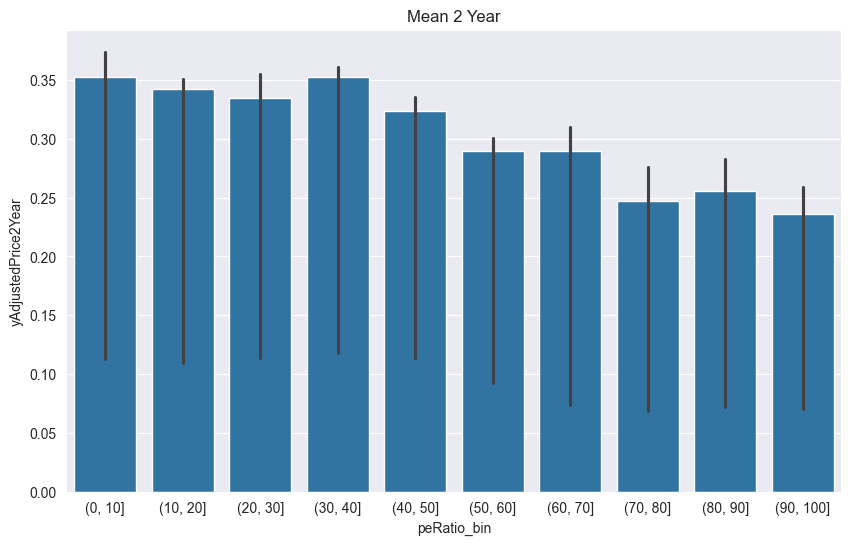

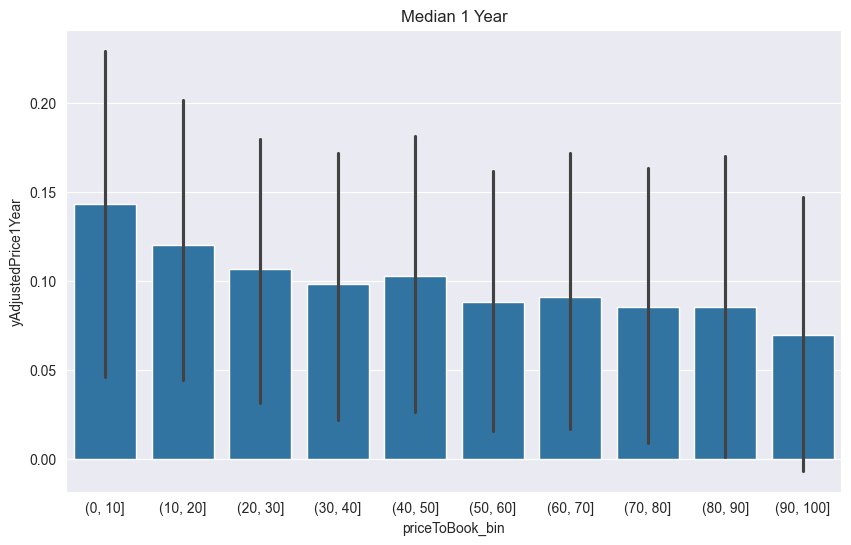

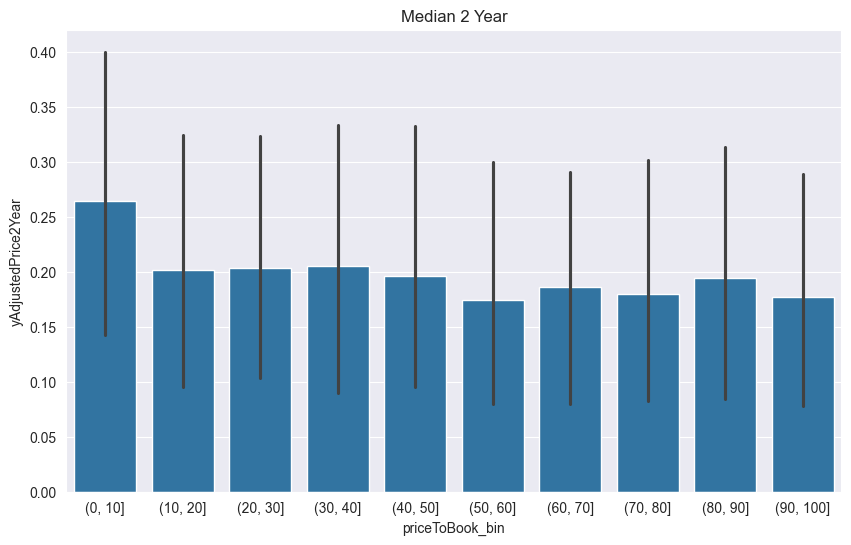

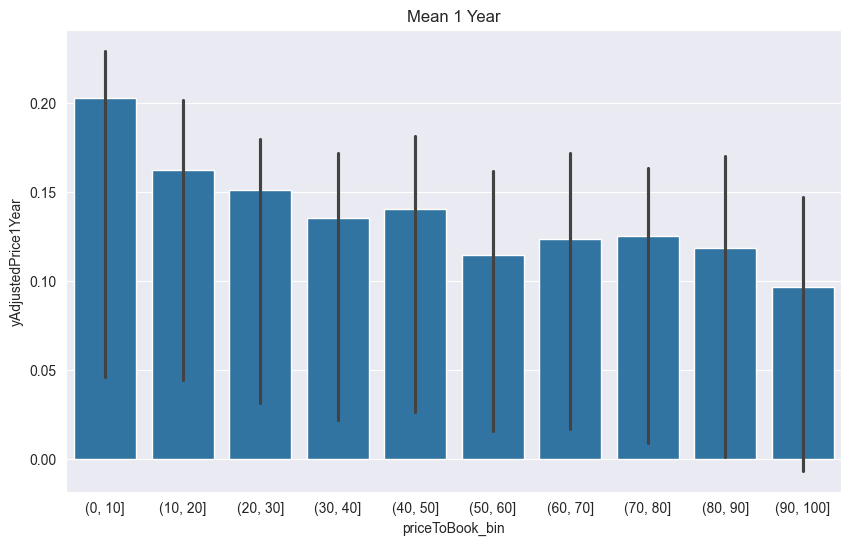

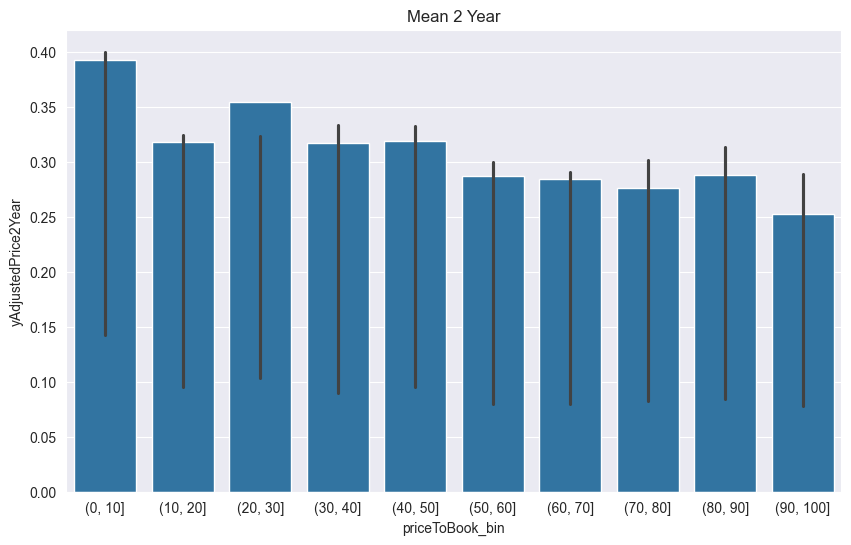

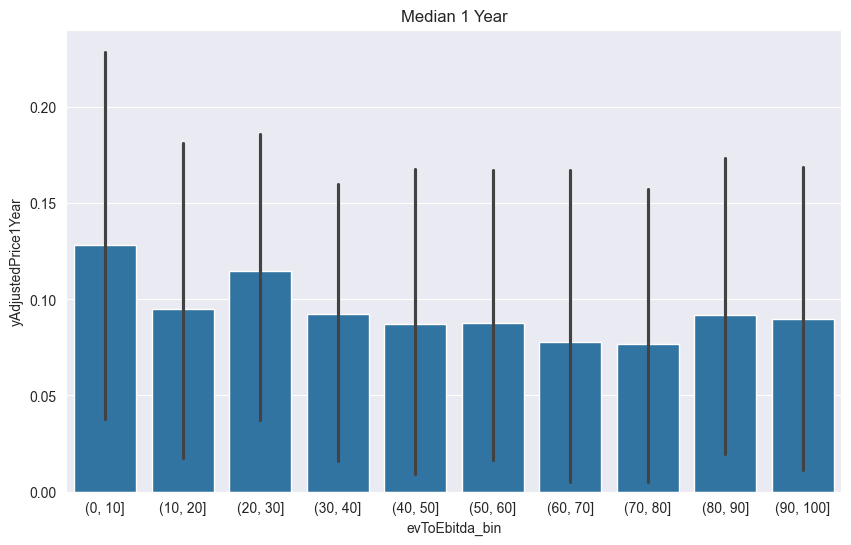

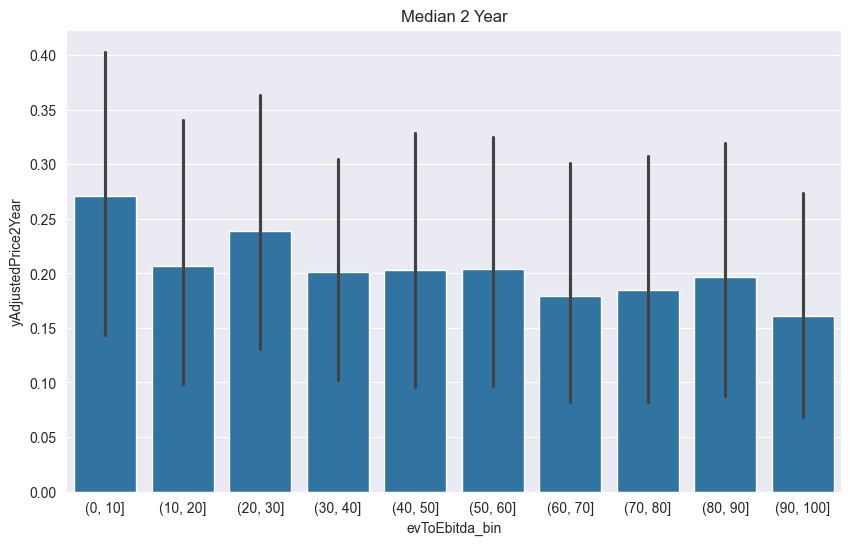

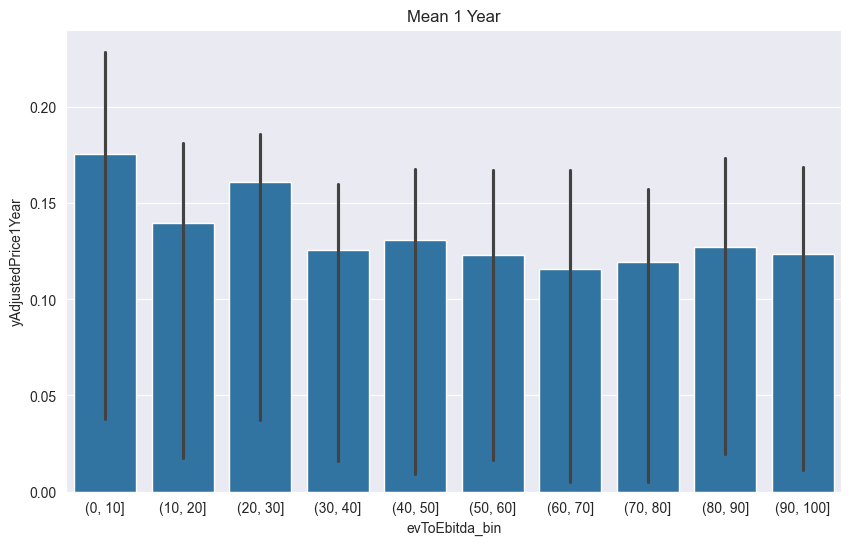

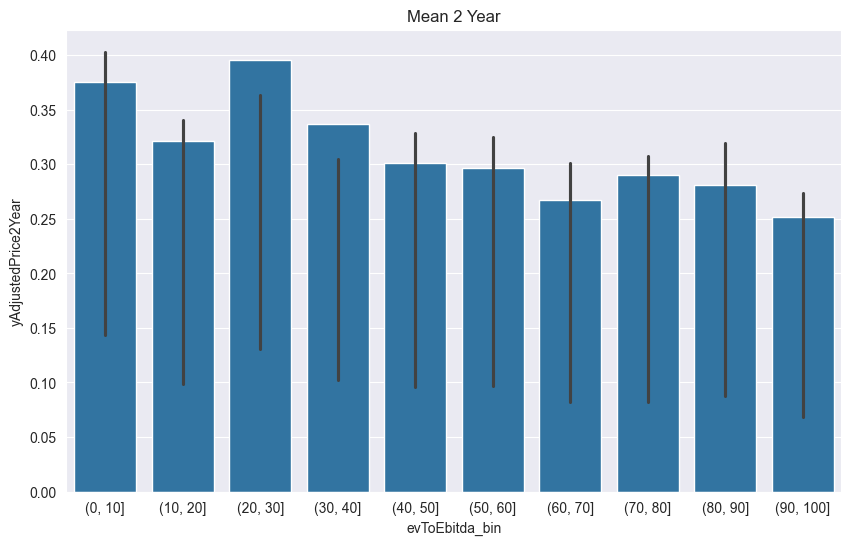

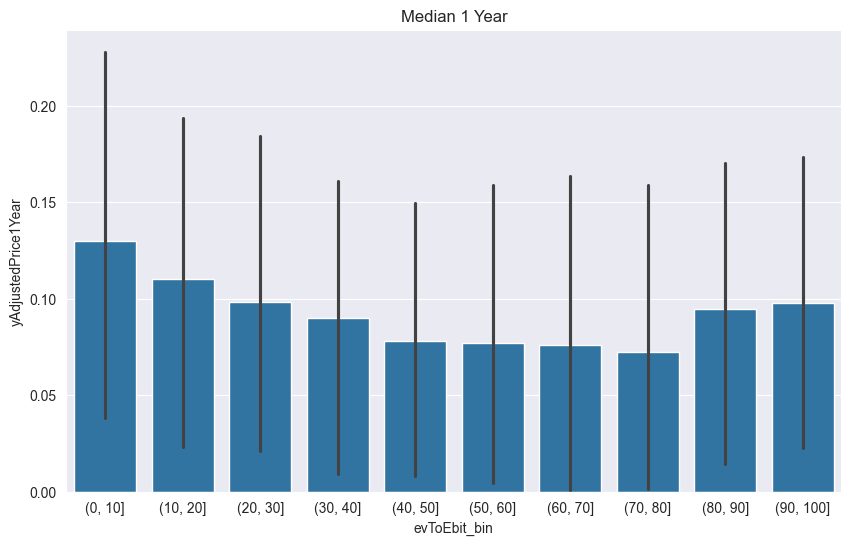

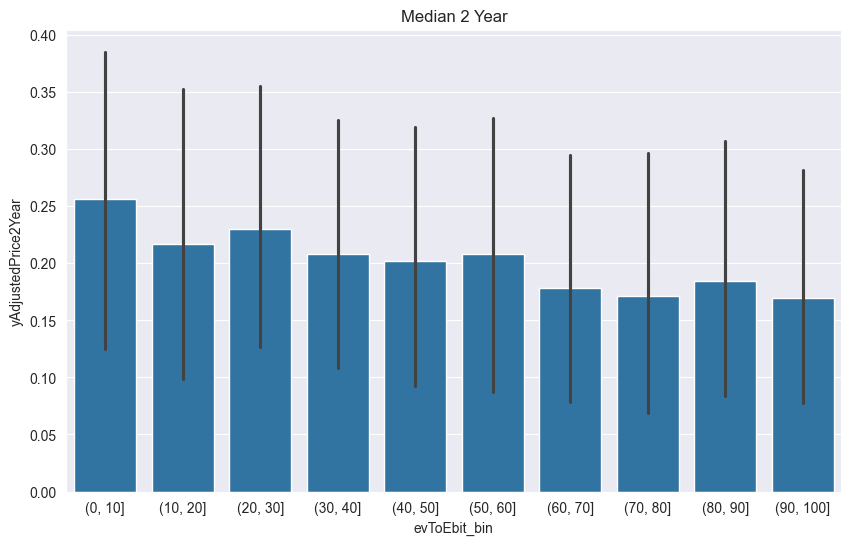

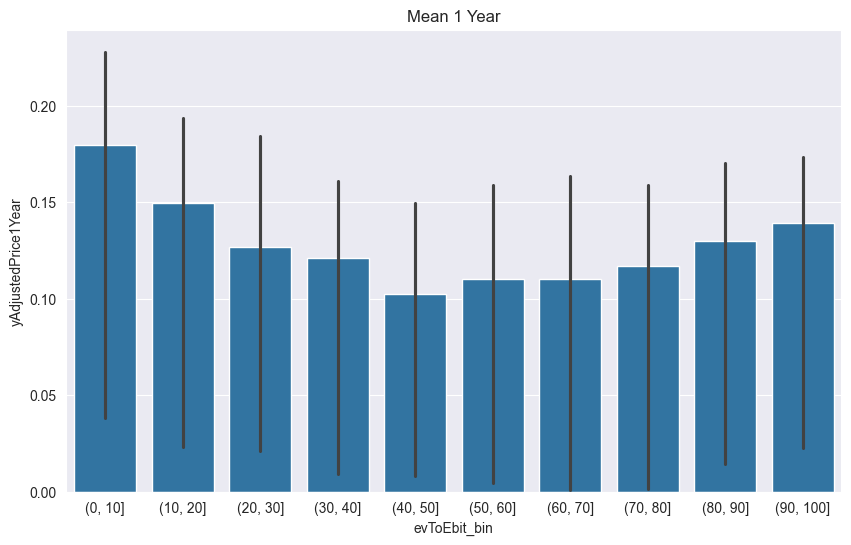

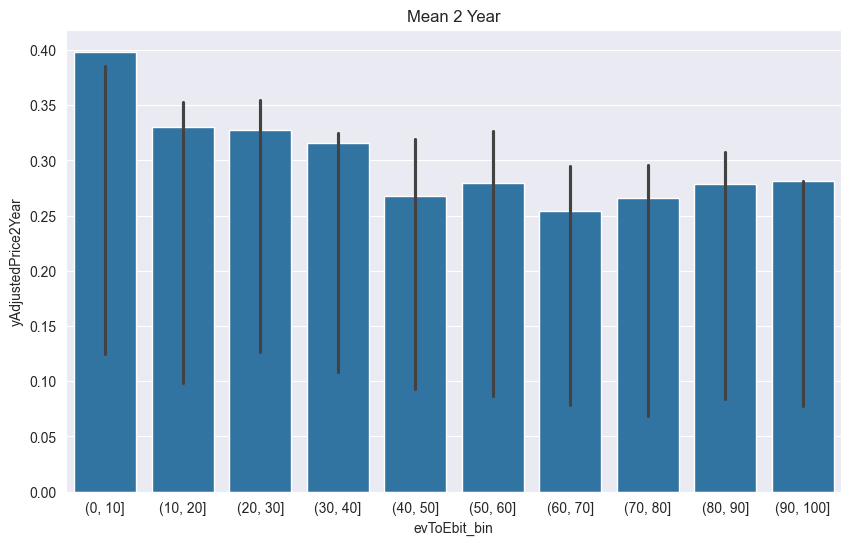

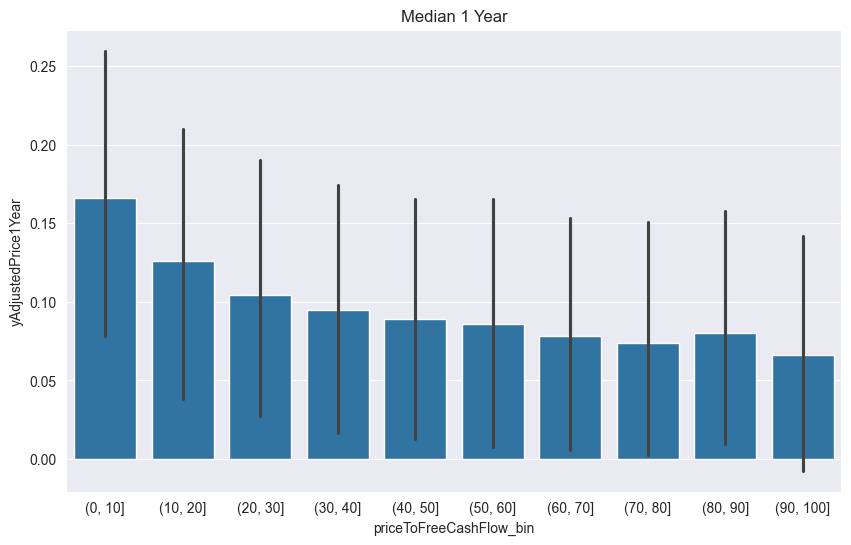

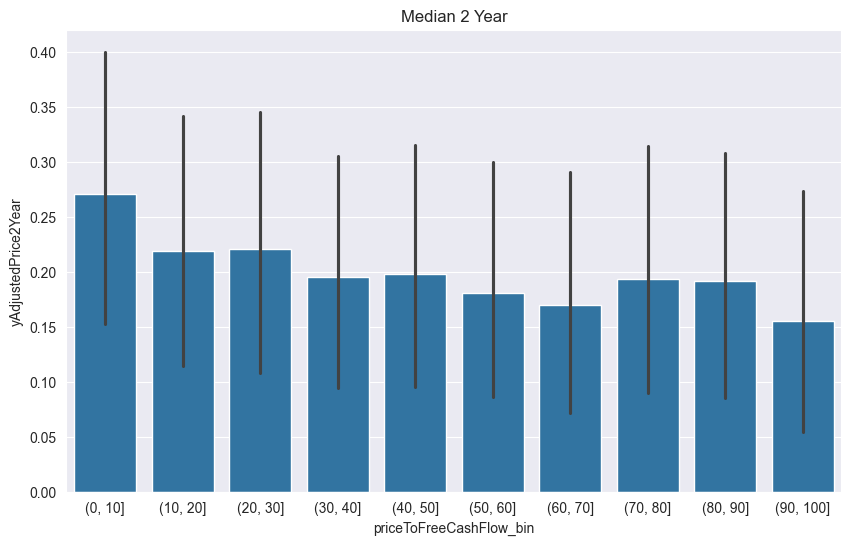

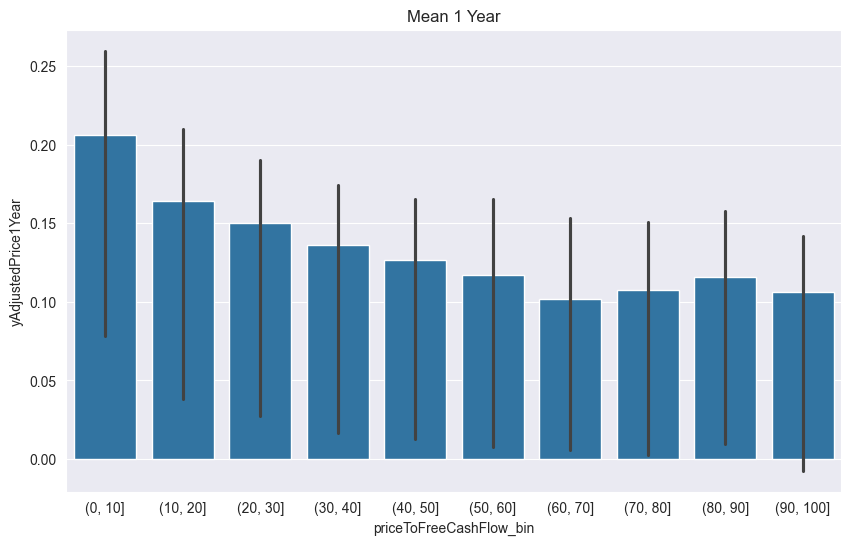

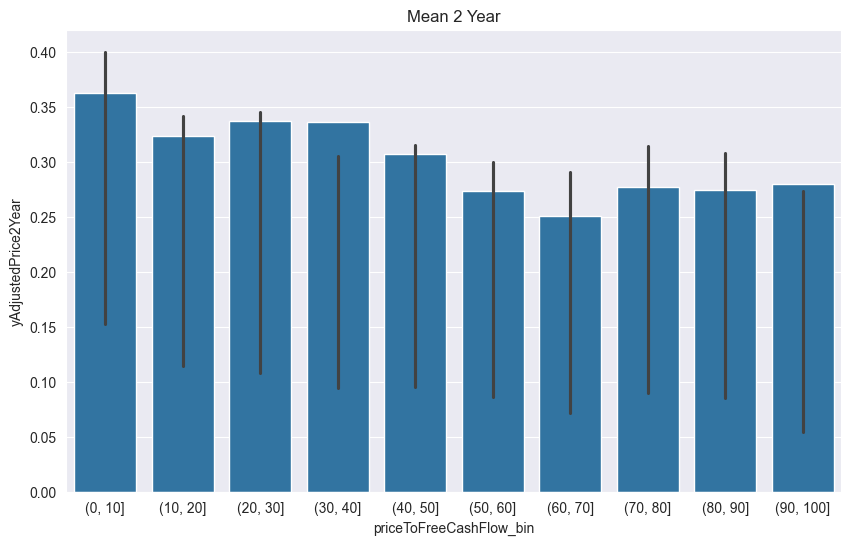

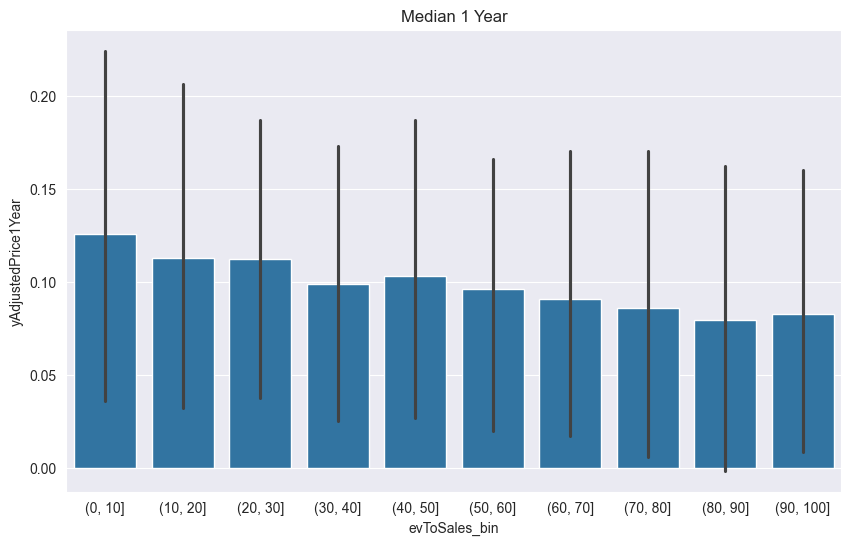

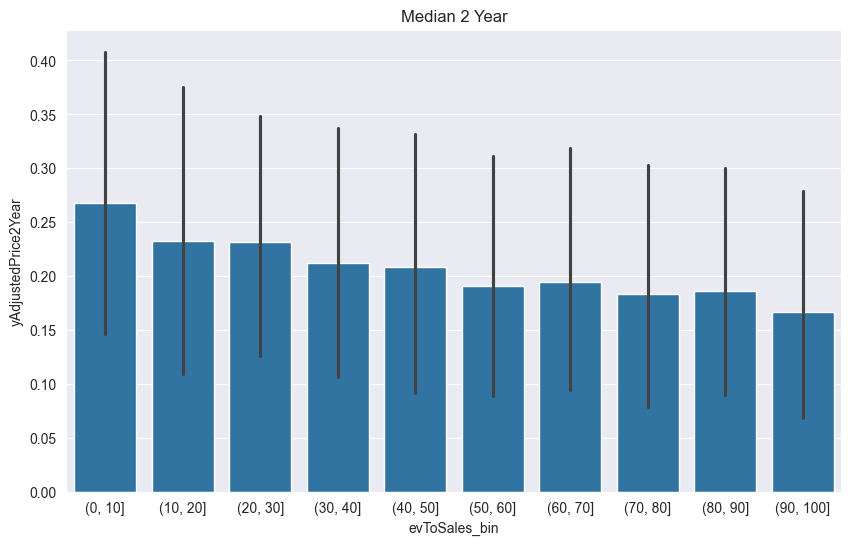

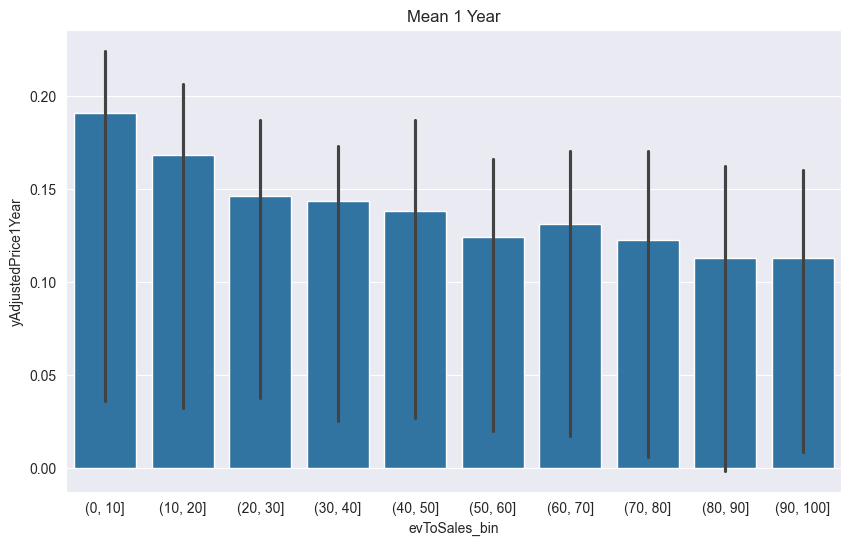

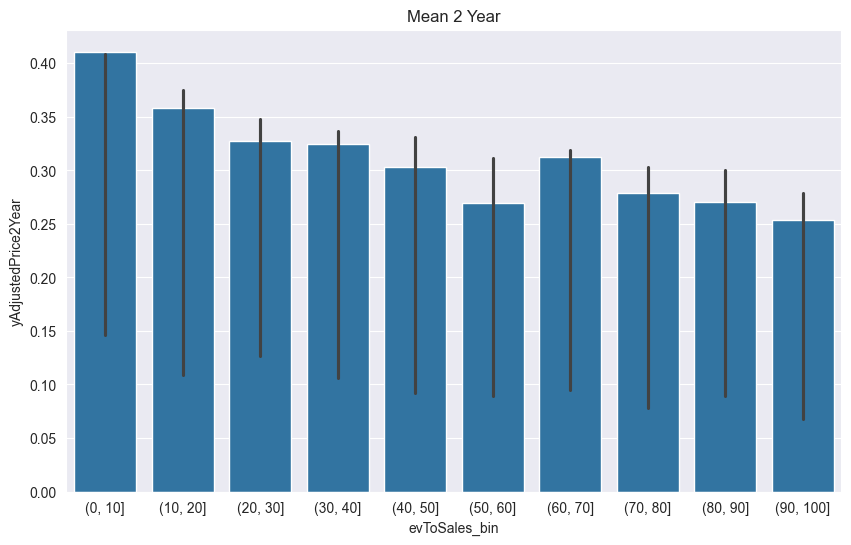

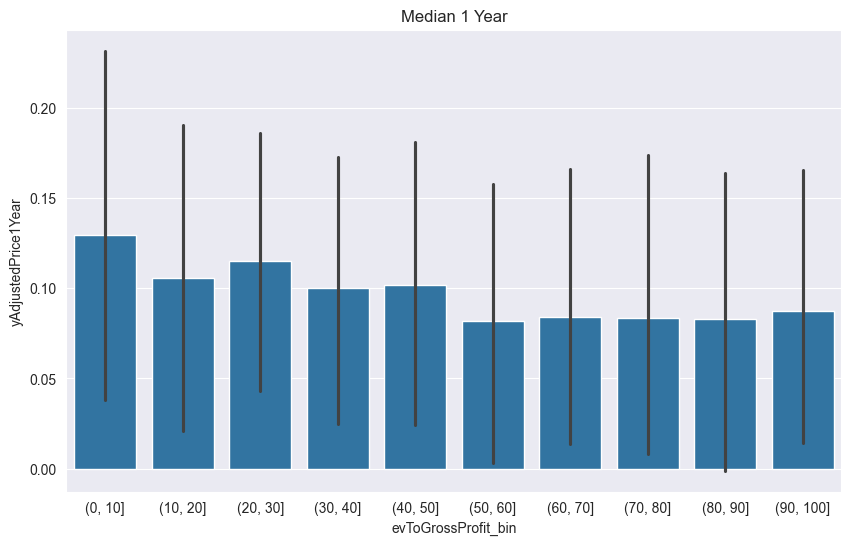

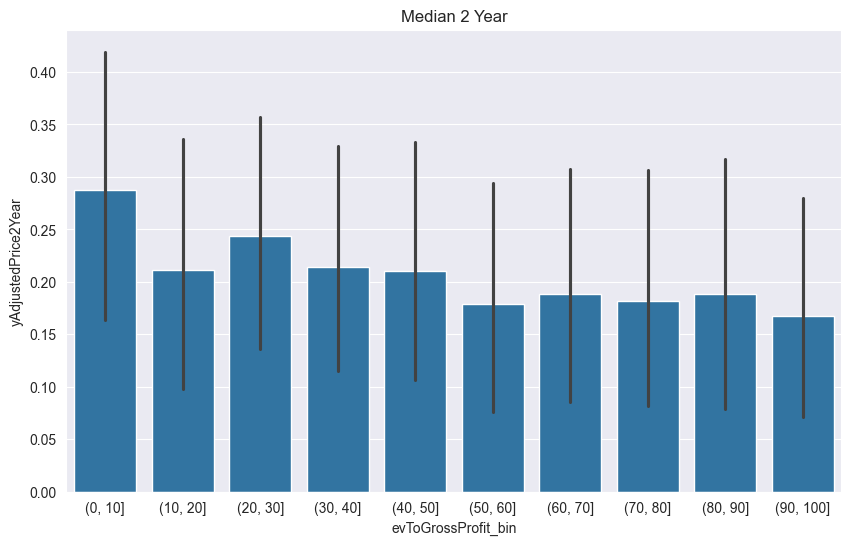

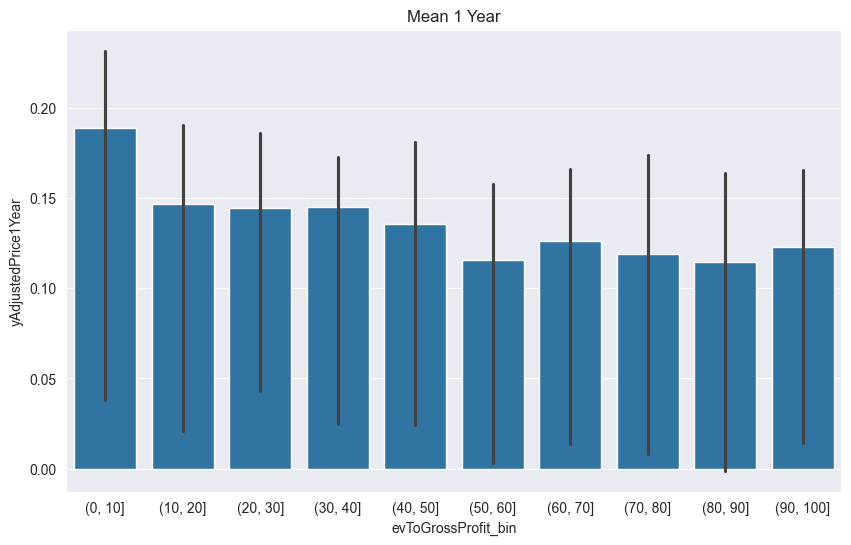

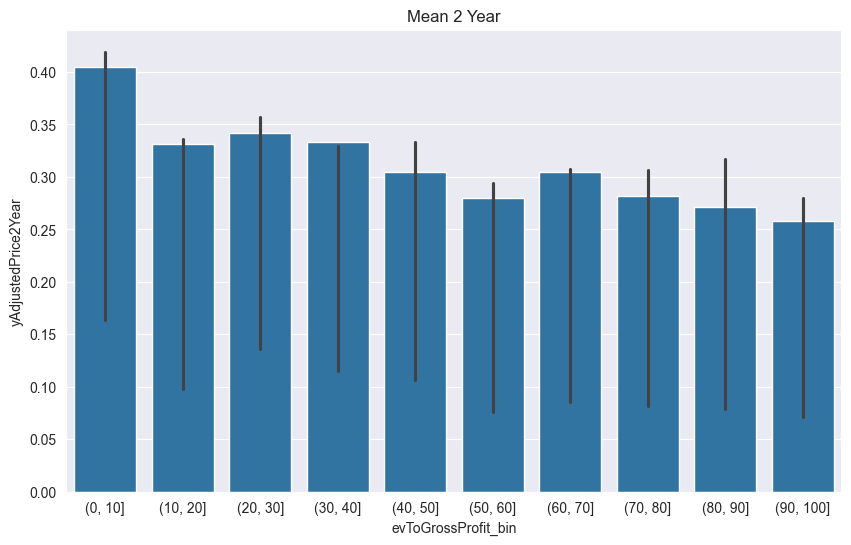

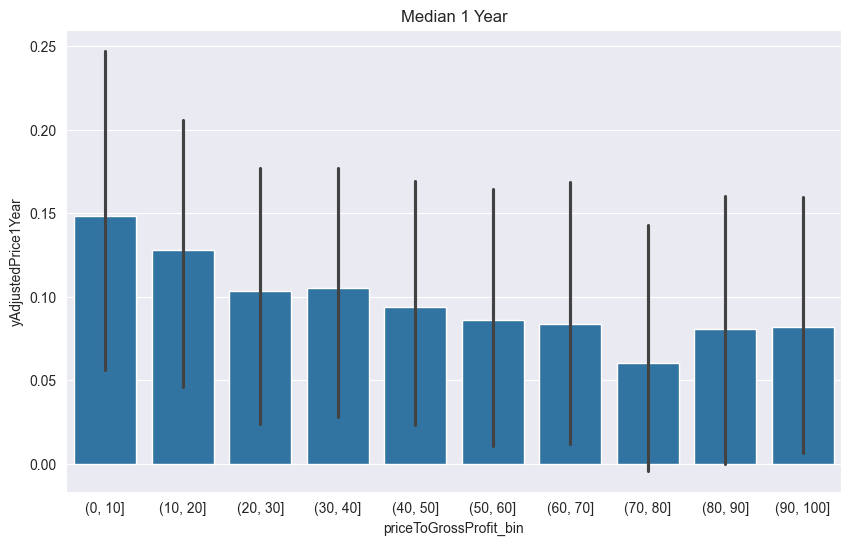

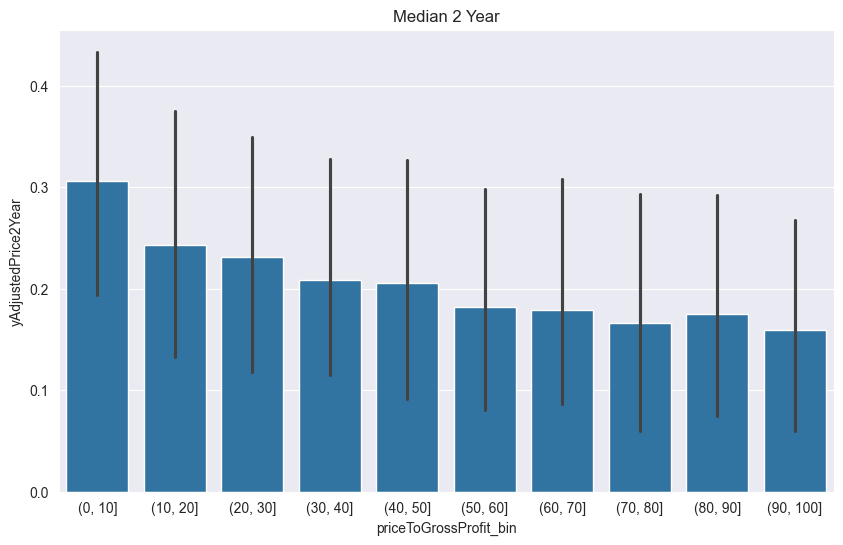

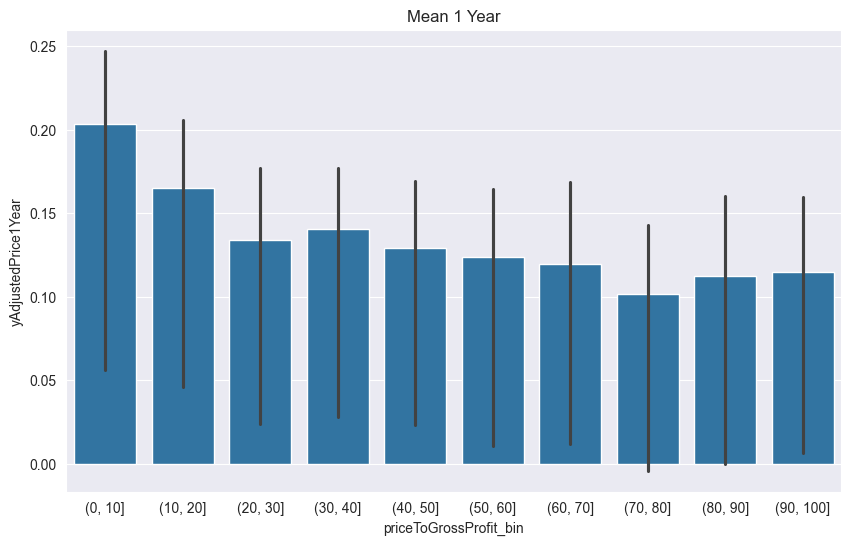

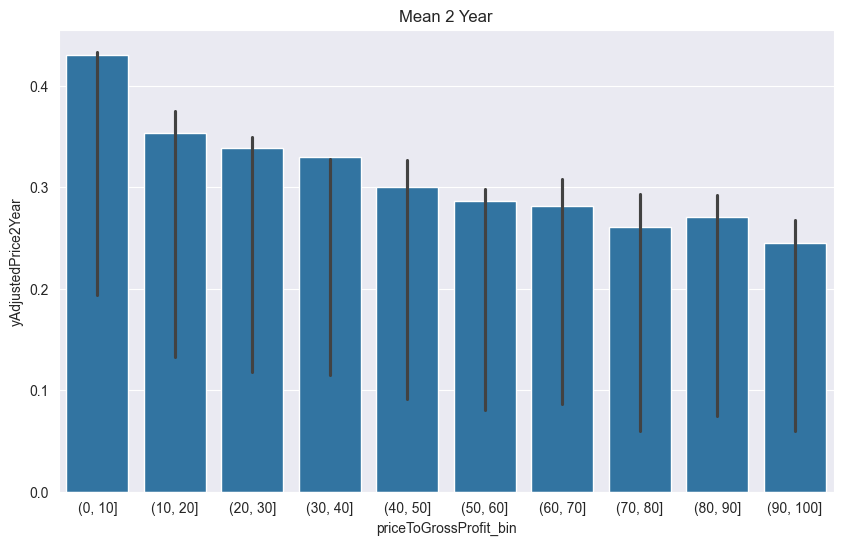

In [6]:

# relative group
for key in ratioKeys:
    bin_edges = range(0, 110, 10)
    bin_key = key + '_bin'
    relativeDf[bin_key] = pd.cut(relativeDf[key],bins=bin_edges)
    # sns.boxplot(data=relativeDf, x=key+'_bin', y='yAdjustedPrice1Year')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(relativeDf, x=bin_key, y='yAdjustedPrice1Year', estimator=np.median, errorbar=('pi', 25))
    plt.title('Median 1 Year')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(relativeDf, x=bin_key, y='yAdjustedPrice2Year', estimator=np.median, errorbar=('pi', 25))
    plt.title('Median 2 Year')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(relativeDf, x=bin_key, y='yAdjustedPrice1Year',  errorbar=('pi', 25))
    plt.title('Mean 1 Year')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(relativeDf, x=bin_key, y='yAdjustedPrice2Year',  errorbar=('pi', 25))
    plt.title('Mean 2 Year')
    plt.show()